# Capstone - PGPDSE-FT.B.OCT19
Group Name: Group 3

Domain: Web and Social Media Analytics

Abstract: This dataset summarizes a heterogeneous set of features about articles published by Mashable in a period of two years. The goal is to predict the number of shares in social networks (popularity). Online platforms like Medium, Buzzfeed and Mashable etc. publish hundreds of articles every day. These articles belong to certain categories like entertainment, technology, sports etc. and are posted on different days of the week. This project aims to predict the popularity of an online news article before it is published. Such a tool will help publishers and editors in maximizing the popularity of their articles and sell advertisement.

Attribute Information:

Number of Attributes: 61 (58 predictive attributes, 2 non-predictive, 1 goal field)

Attribute Information:
https://archive.ics.uci.edu/ml/datasets/Online+News+Popularity#

Original Research Paper: https://link.springer.com/chapter/10.1007/978-3-319-23485-4_53

Type of Problem : Classification. Given the features of an article, predict whether the article will be popular or not.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_profiling as pp

# Ignoring Warnings

import warnings
warnings.filterwarnings("ignore")

In [2]:
online_news=pd.read_csv('OnlineNewsPopularity.csv')

In [3]:
online_news.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [4]:
online_news.shape

(39644, 61)

In [5]:
online_news.dtypes

url                                object
 timedelta                        float64
 n_tokens_title                   float64
 n_tokens_content                 float64
 n_unique_tokens                  float64
 n_non_stop_words                 float64
 n_non_stop_unique_tokens         float64
 num_hrefs                        float64
 num_self_hrefs                   float64
 num_imgs                         float64
 num_videos                       float64
 average_token_length             float64
 num_keywords                     float64
 data_channel_is_lifestyle        float64
 data_channel_is_entertainment    float64
 data_channel_is_bus              float64
 data_channel_is_socmed           float64
 data_channel_is_tech             float64
 data_channel_is_world            float64
 kw_min_min                       float64
 kw_max_min                       float64
 kw_avg_min                       float64
 kw_min_max                       float64
 kw_max_max                       

In [6]:
# Remove duplicates
online_news=online_news.drop_duplicates()

In [7]:
# Find out all variables that contain missing values

online_news_na = online_news.isna().sum()
online_news_na[online_news_na.values > 0].sort_values(ascending=False) 

Series([], dtype: int64)

In [8]:
online_news.shape

(39644, 61)

## No missing values and no duplicates

In [9]:
pp.ProfileReport(online_news)

Number of variables,61
Number of observations,39644
Total Missing (%),0.0%
Total size in memory,18.8 MiB
Average record size in memory,496.0 B
Numeric,43
Categorical,0
Boolean,14
Date,0
Text (Unique),1
Rejected,3


In [10]:
# Removing space character in the feature names

online_news.columns=online_news.columns.str.replace(' ','')

In [11]:
# n_tokens_content represents Number of words in the content
# However we see its minimum value to be 0. Means that there are articles that do not have any content.
# Such records should be dropped as their related attributes add no meaning to our analysis

# find number of rows that contain 0 for n_tokens_content

num_rows_nowords = online_news[online_news['n_tokens_content'] == 0 ].index
print("Number of news items with no words are : ",num_rows_nowords.size)

Number of news items with no words are :  1181


In [12]:
# Drop these items or rows with n_tokens_content = 0

#online_news = online_news.drop(num_rows_nowords , inplace=True)
online_news = online_news[online_news['n_tokens_content'] != 0]

In [13]:
online_news.shape

(38463, 61)

In [14]:
# Since URL is a non-numeric attribute and will not add value to our analysis so dropping it from the dataset
# Also timedelta is a non-predictive attribute and not a feature of the data set so we can drop it from the dataset
# Drop highly correlated attributes "n_non_stop_unique_tokens","n_non_stop_words","kw_avg_min"
online_news = online_news.drop('url',axis=1)
online_news = online_news.drop('timedelta',axis=1)
online_news = online_news.drop(["n_non_stop_unique_tokens","n_non_stop_words","kw_avg_min"],axis=1)

In [15]:
online_news.shape

(38463, 56)

# Outlier calculation

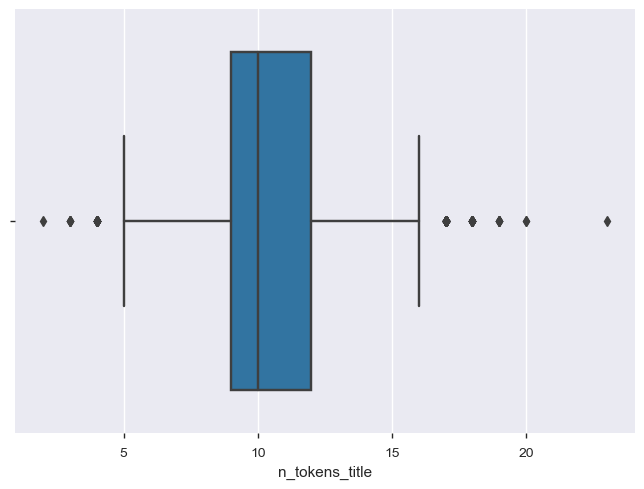

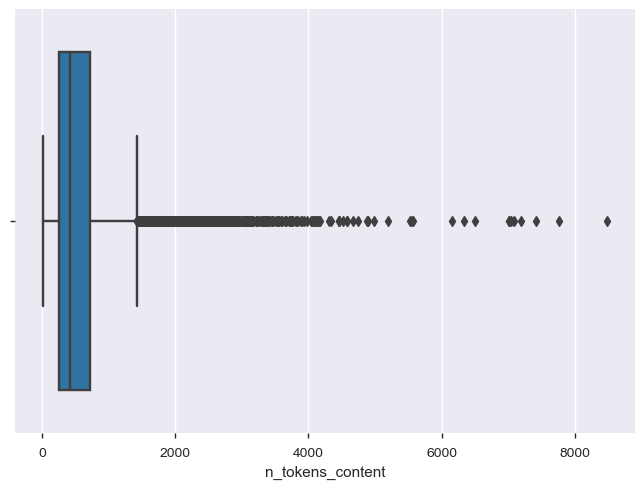

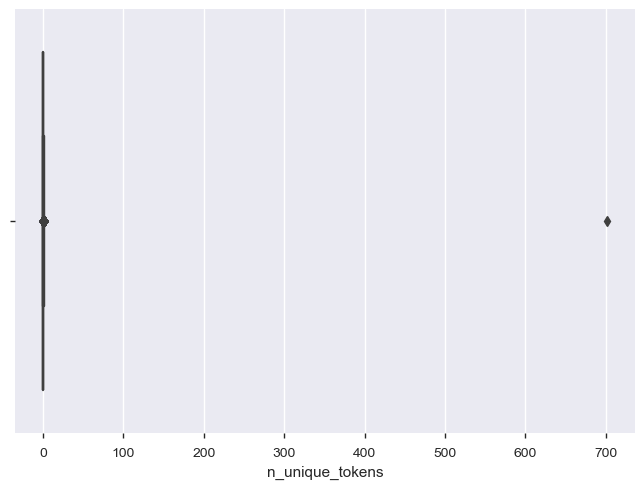

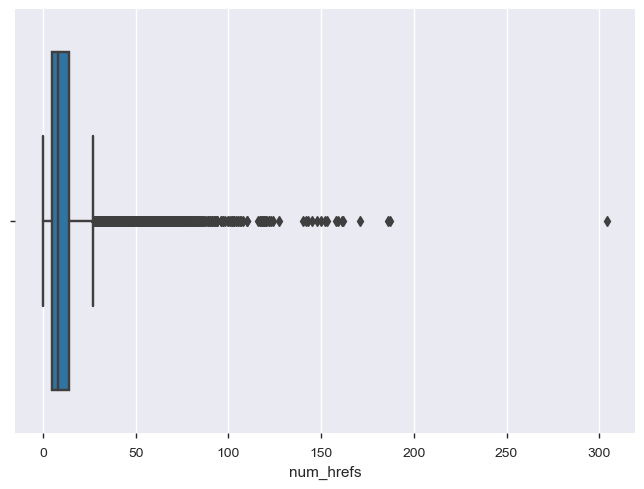

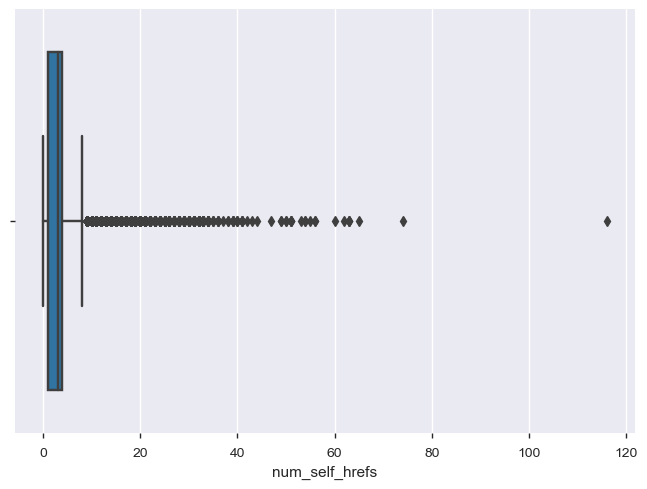

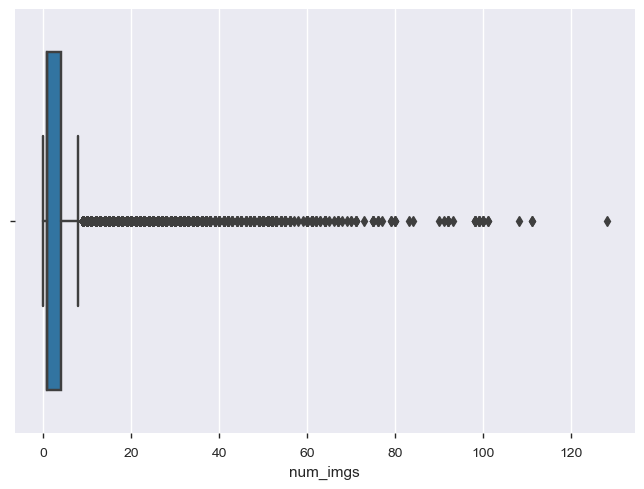

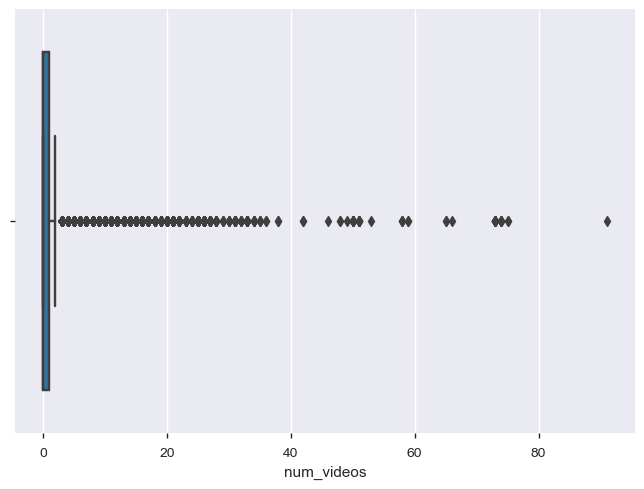

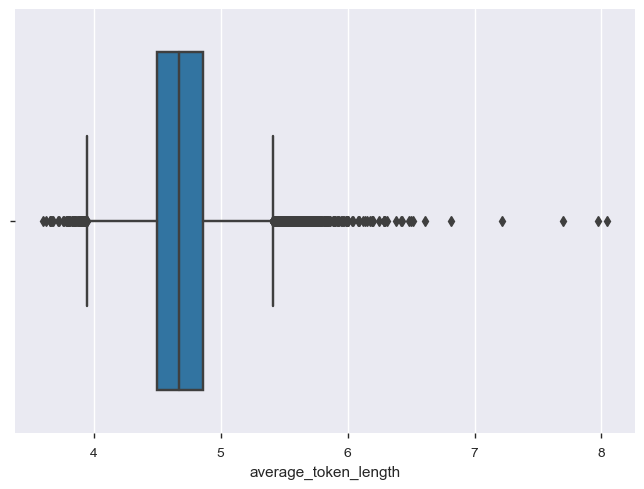

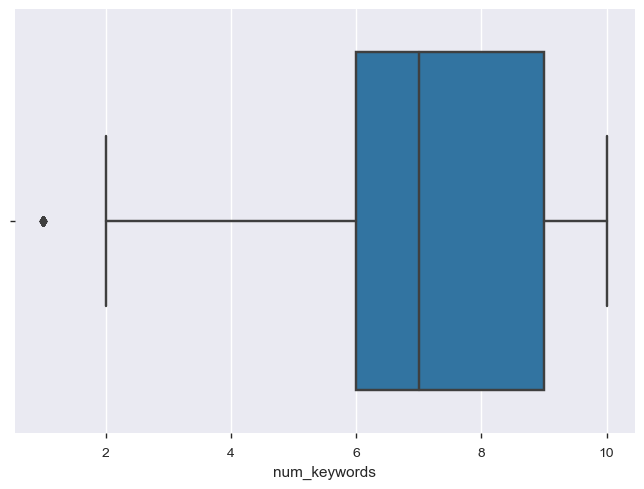

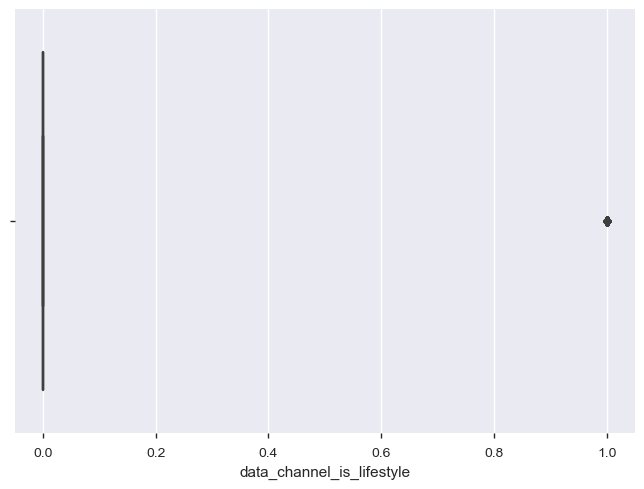

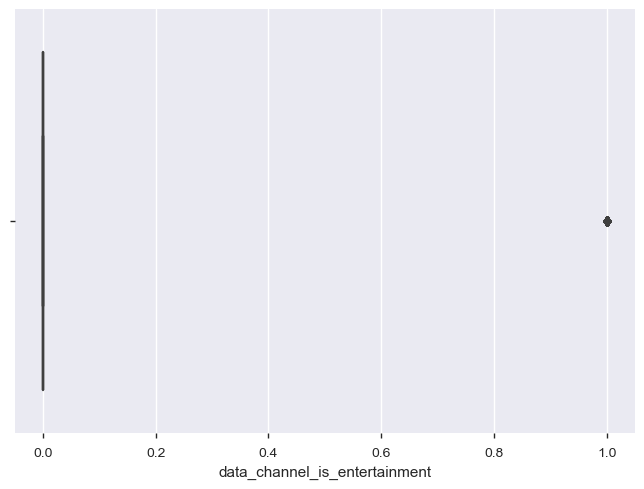

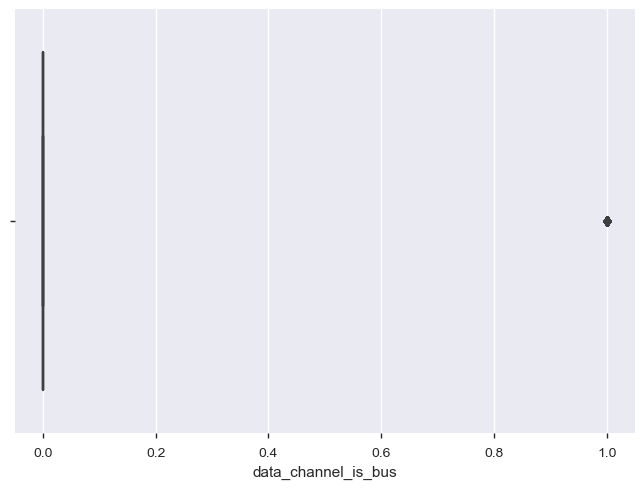

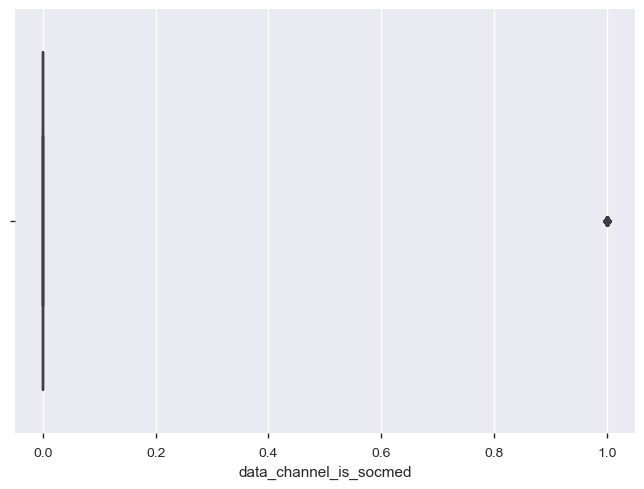

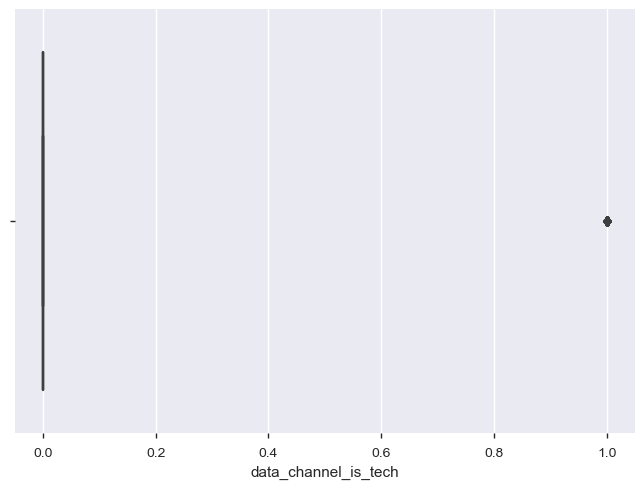

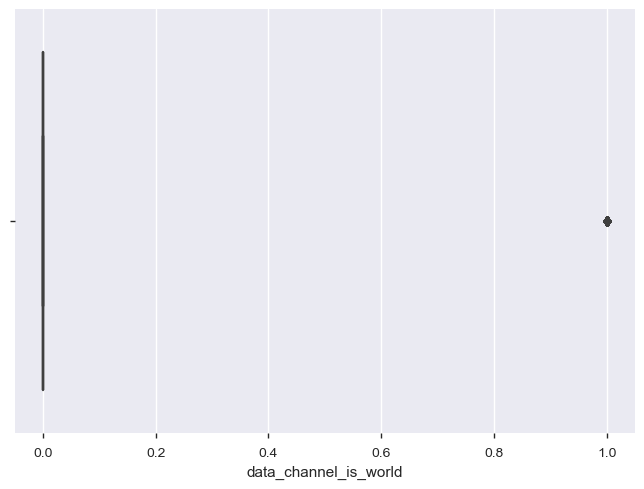

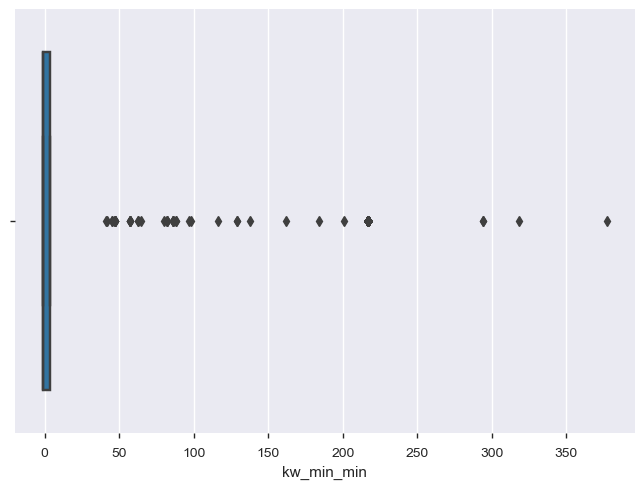

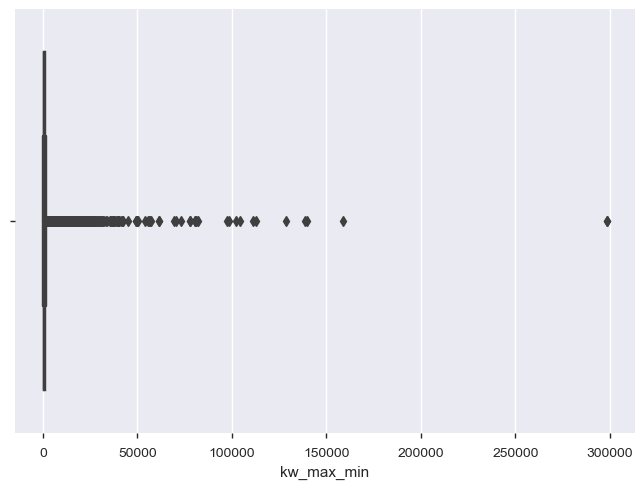

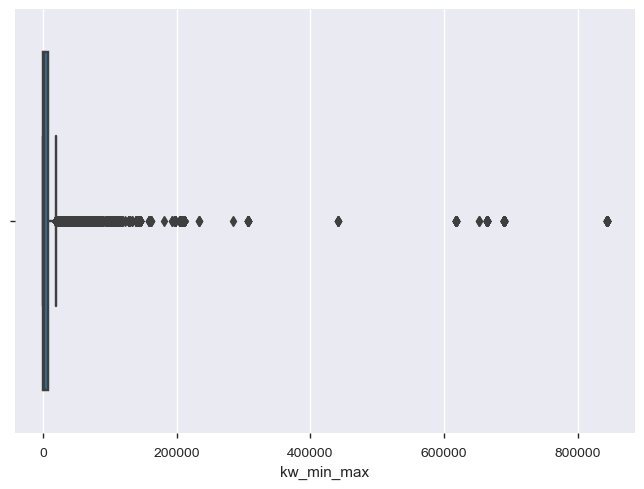

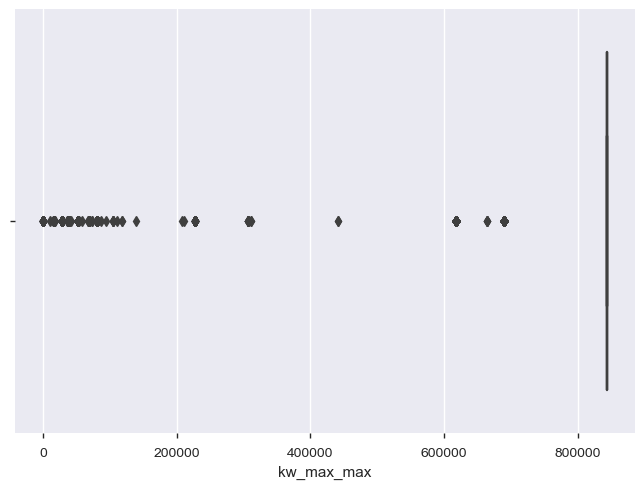

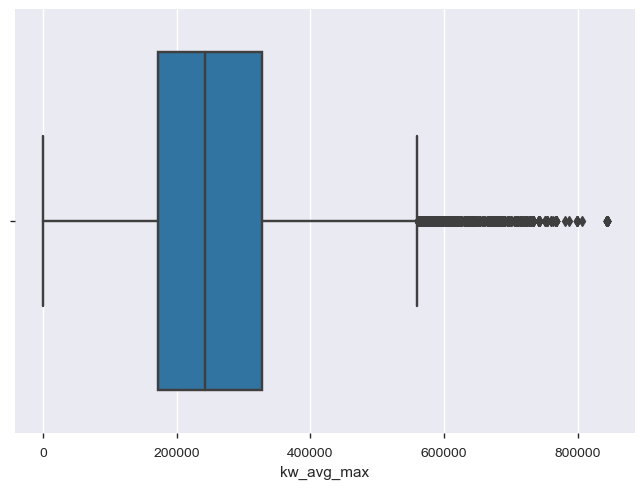

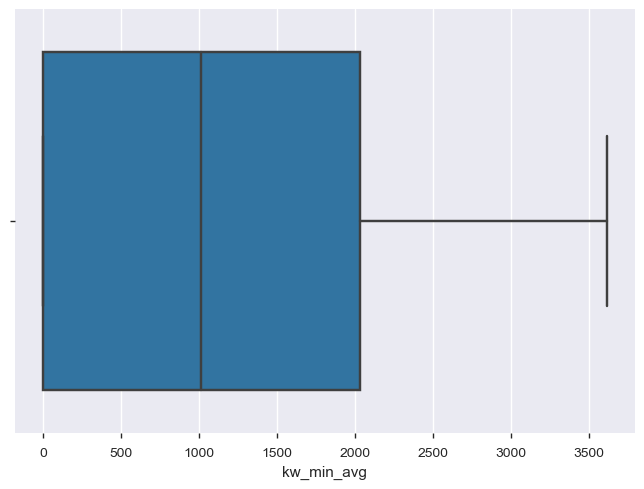

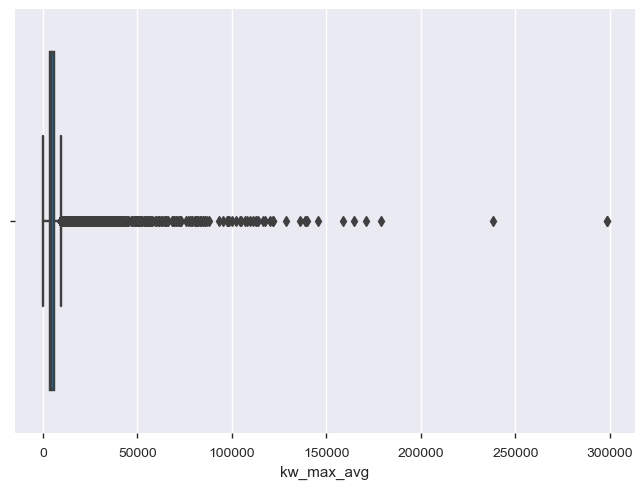

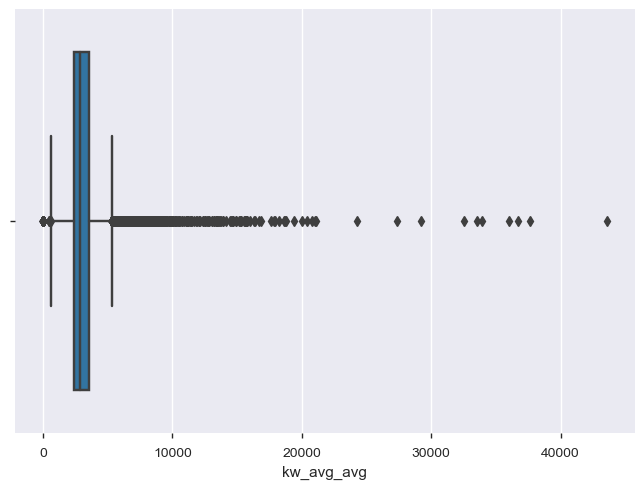

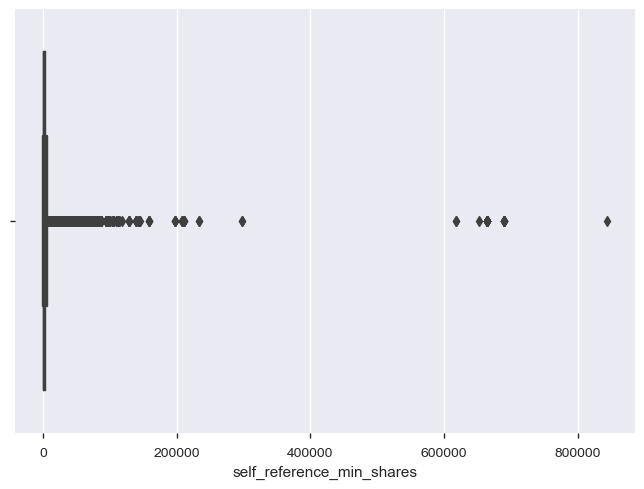

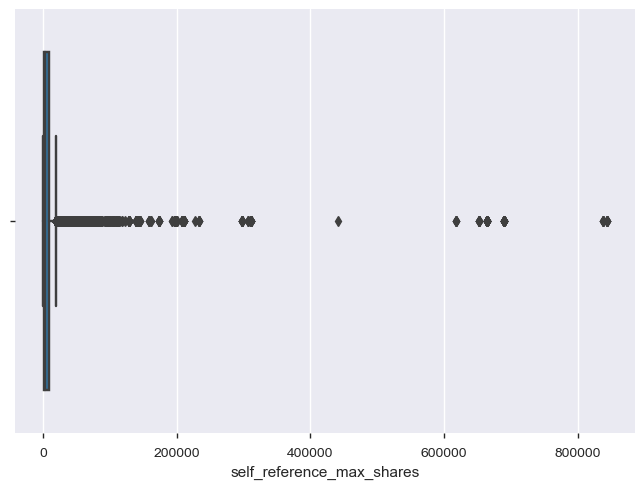

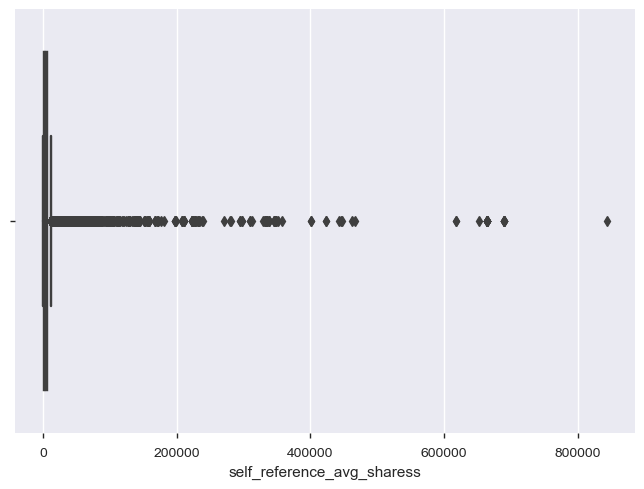

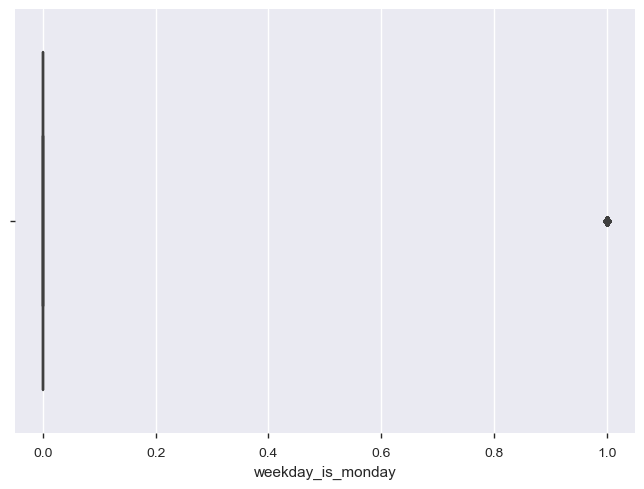

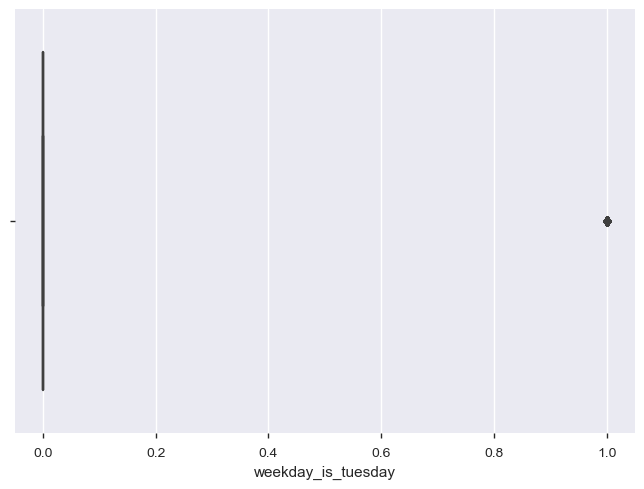

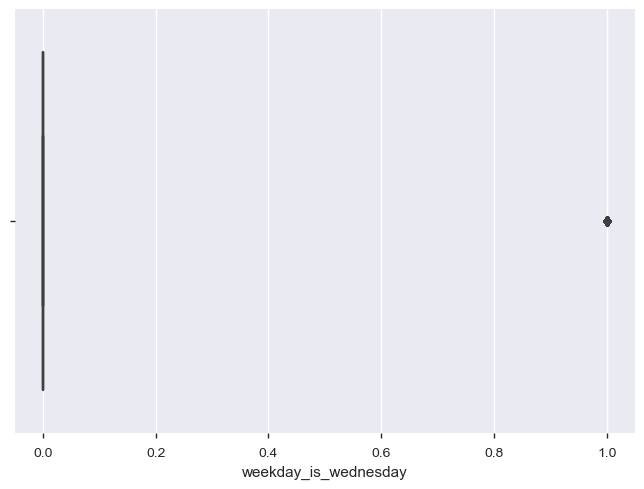

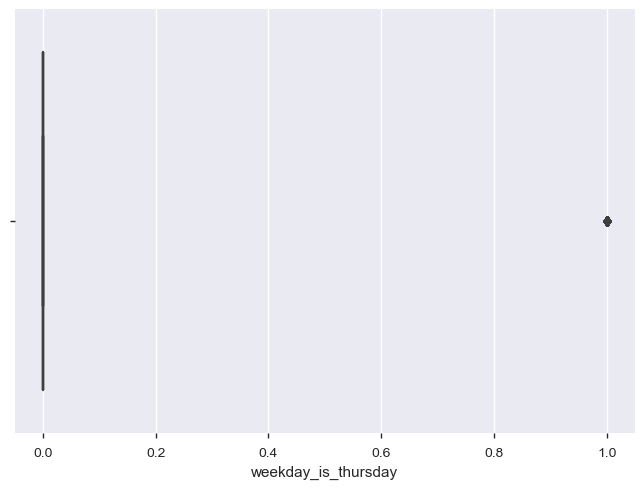

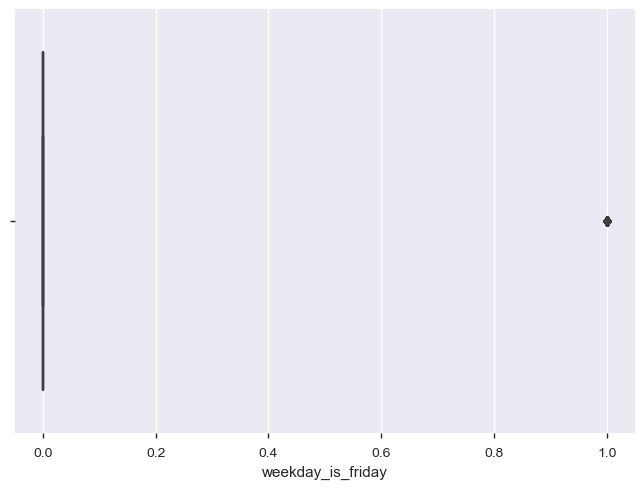

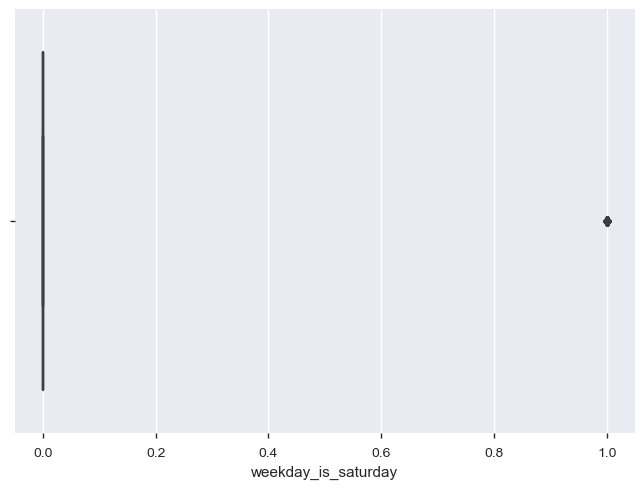

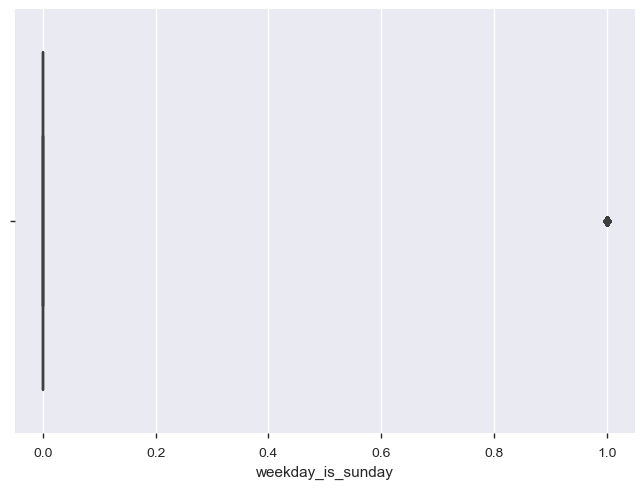

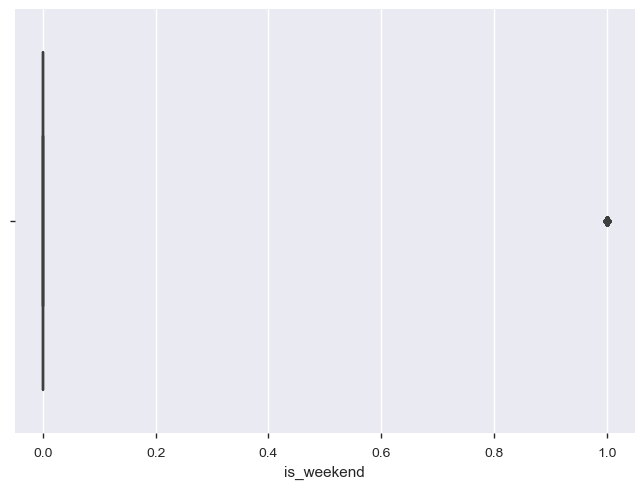

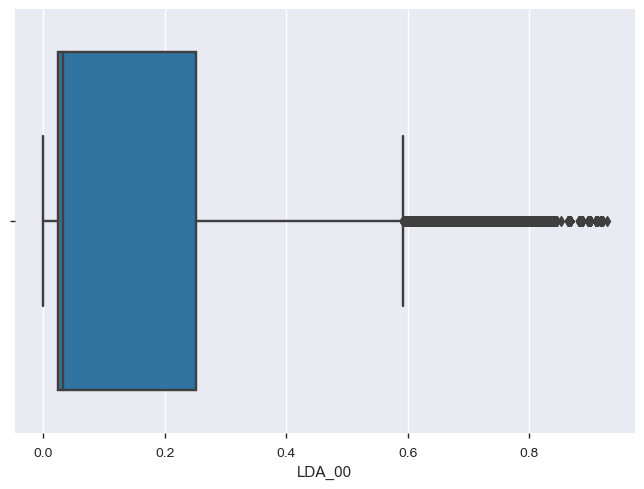

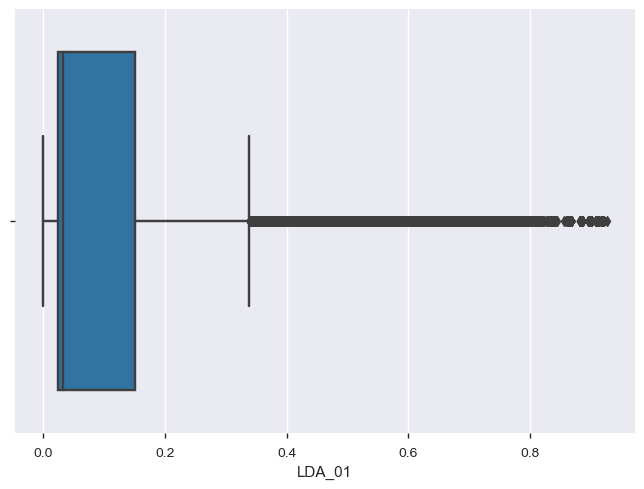

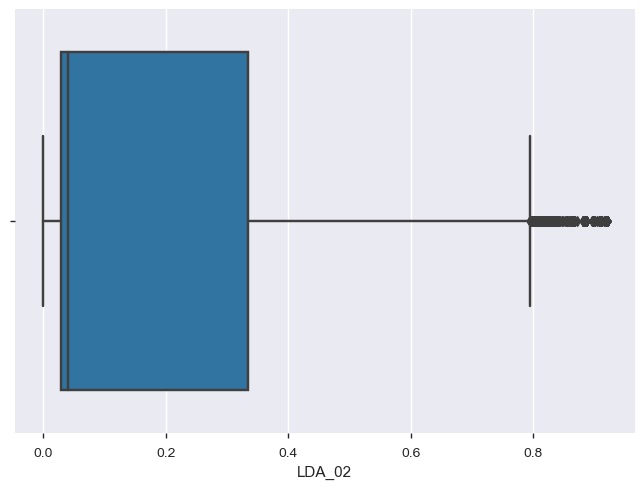

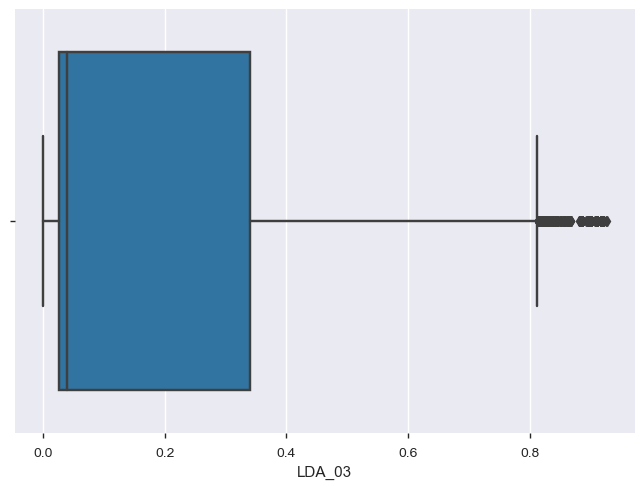

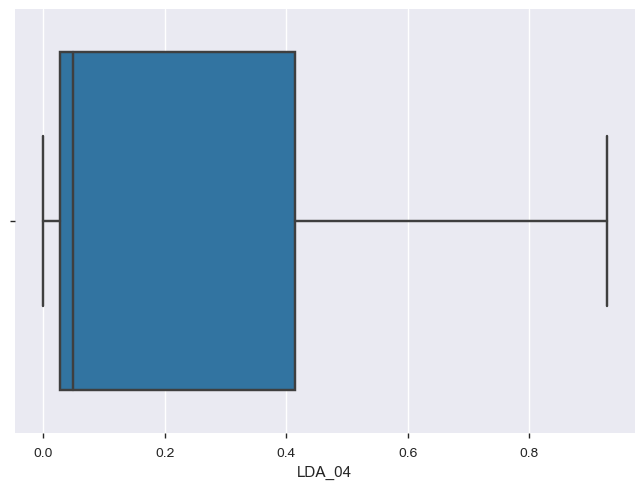

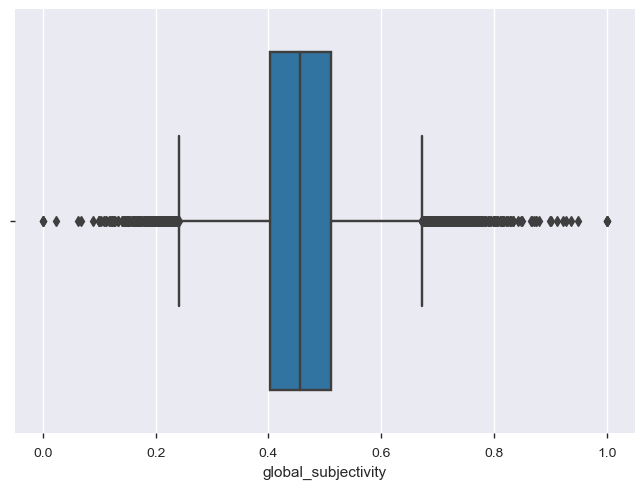

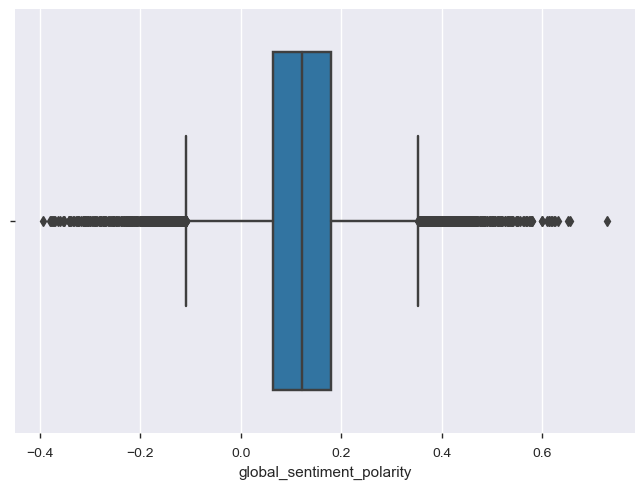

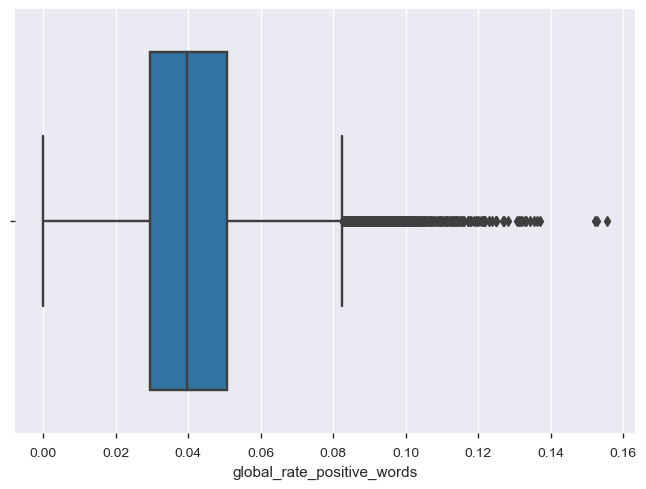

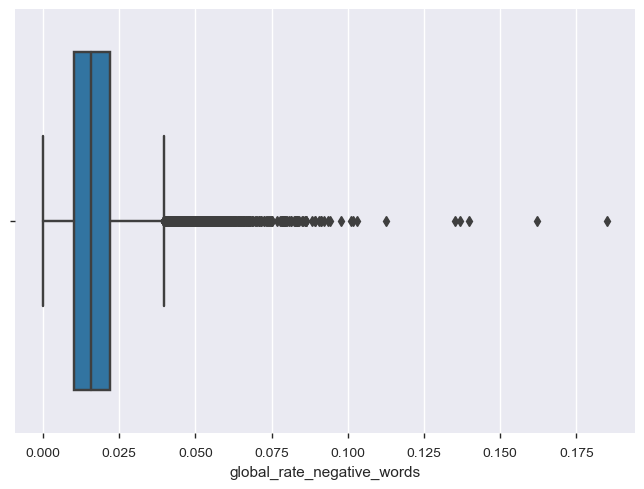

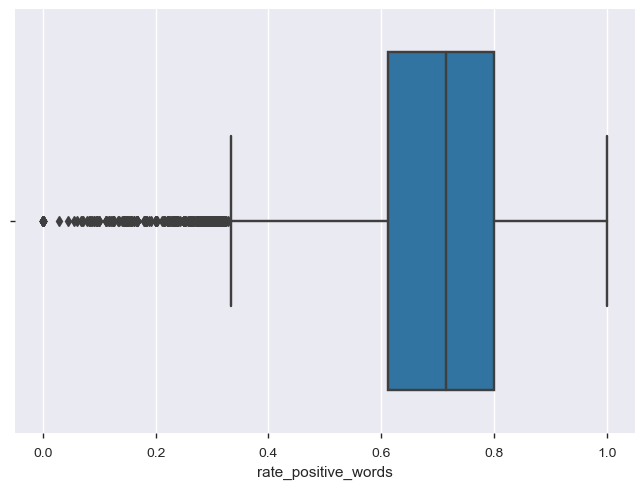

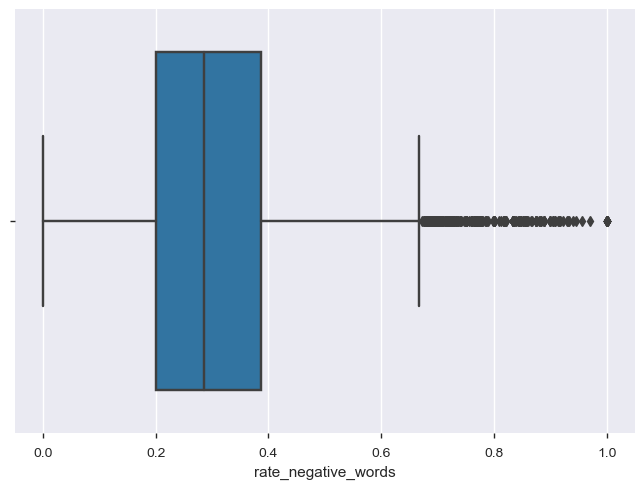

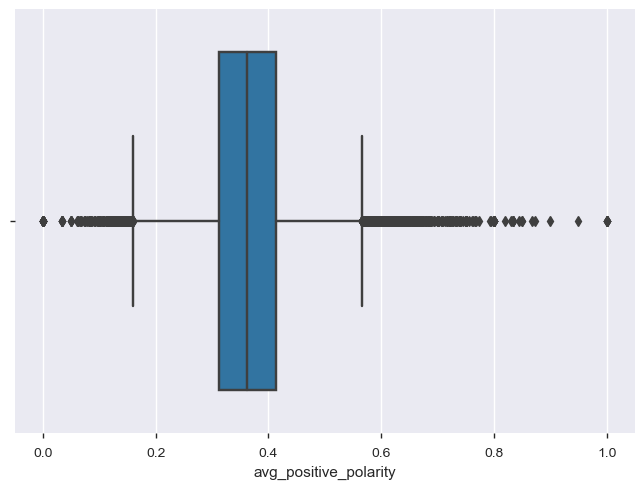

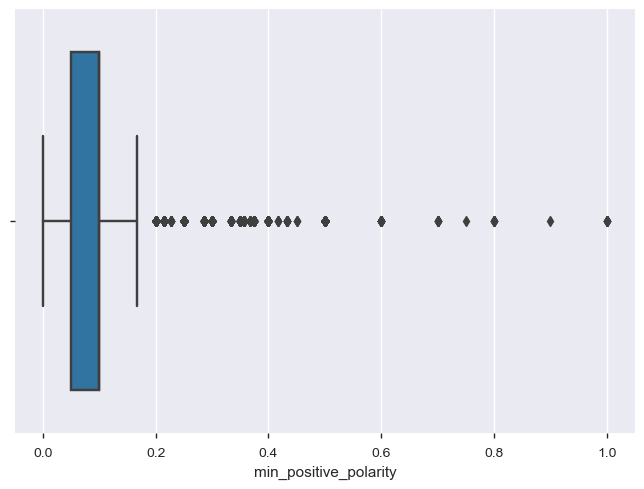

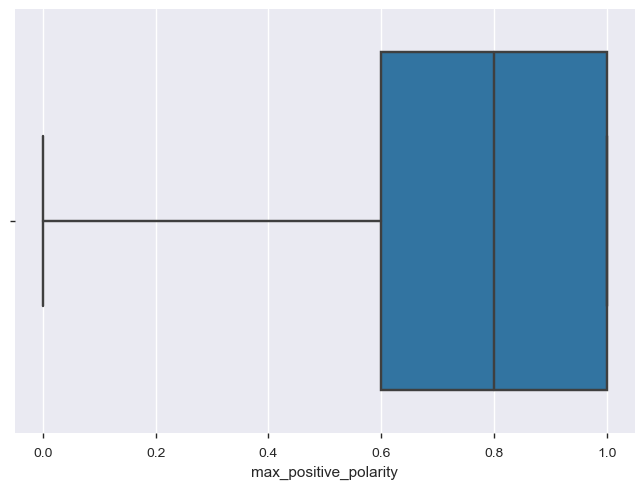

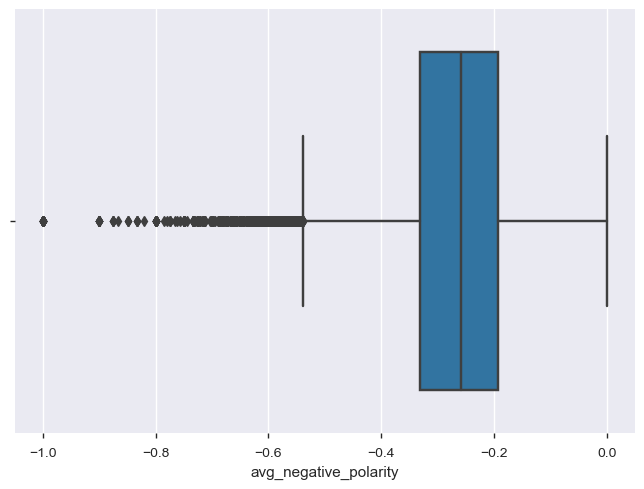

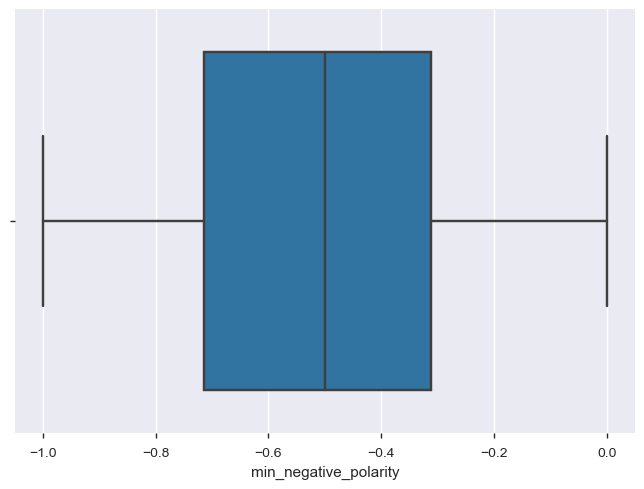

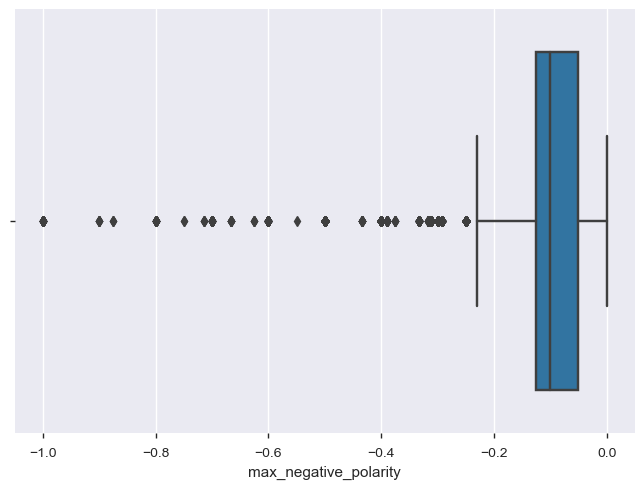

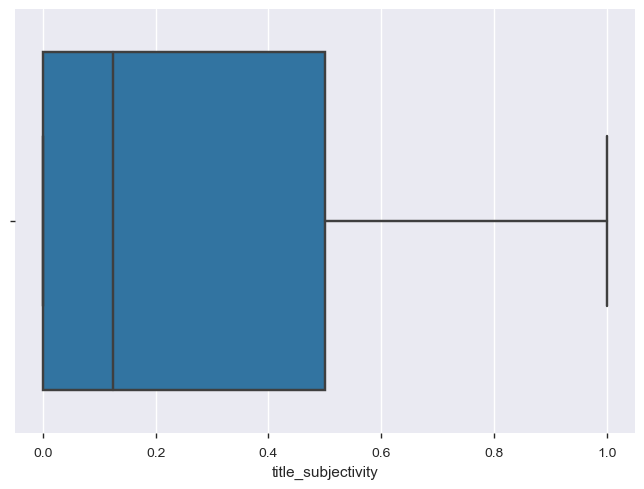

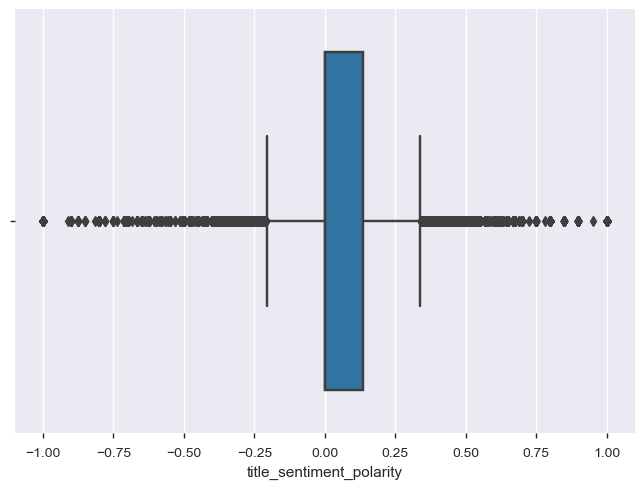

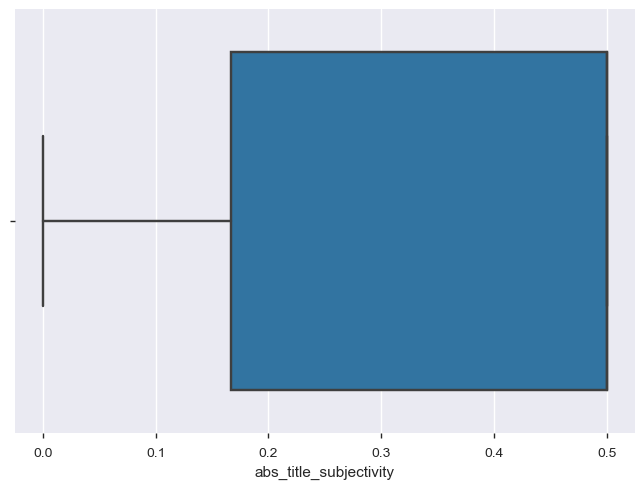

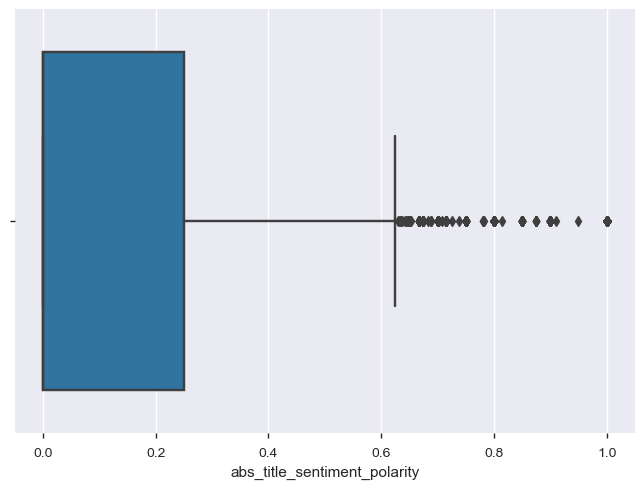

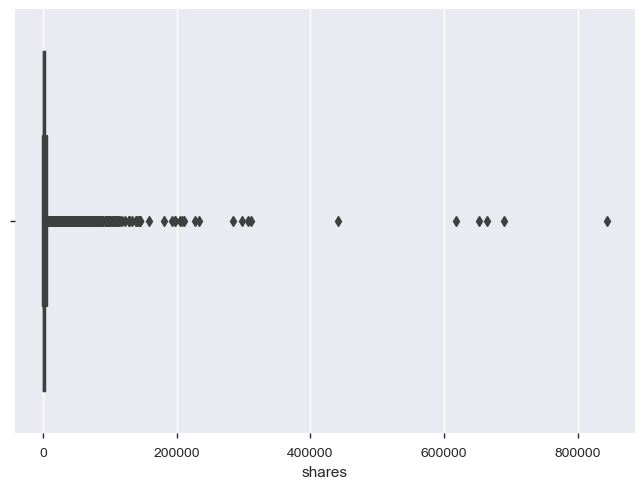

In [16]:
for i in online_news.columns:
    sns.boxplot(online_news[i])
    plt.show()

In [17]:
Q1 = online_news.quantile(q=0.25) 
Q3 = online_news.quantile(q=0.75)

IQR = Q3-Q1
print('IQR for each column:- ')
print(IQR)

IQR for each column:- 
n_tokens_title                        3.000000
n_tokens_content                    470.000000
n_unique_tokens                       0.133692
num_hrefs                             9.000000
num_self_hrefs                        3.000000
num_imgs                              3.000000
num_videos                            1.000000
average_token_length                  0.365651
num_keywords                          3.000000
data_channel_is_lifestyle             0.000000
data_channel_is_entertainment         0.000000
data_channel_is_bus                   0.000000
data_channel_is_socmed                0.000000
data_channel_is_tech                  0.000000
data_channel_is_world                 0.000000
kw_min_min                            5.000000
kw_max_min                          555.000000
kw_min_max                         7700.000000
kw_max_max                            0.000000
kw_avg_max                       155579.464285
kw_min_avg                         20

In [18]:
sorted_shares = online_news.sort_values('shares') 
median = sorted_shares['shares'].median() 
q1 = sorted_shares['shares'].quantile(q=0.25) 
q3 = sorted_shares['shares'].quantile(q=0.75) 
iqr = q3-q1

In [19]:
# Find major and minor outliers

Inner_bound1 = q1-(iqr*1.5) 
print(f'Inner Boundary 1 = {Inner_bound1}')
Inner_bound2 = q3+(iqr*1.5)  
print(f'Inner Boundary 2 = {Inner_bound2}')
Outer_bound1 = q1-(iqr*3)    
print(f'Outer Boundary 1 = {Outer_bound1}')
Outer_bound2 = q3+(iqr*3)   
print(f'Outer Boundary 2 = {Outer_bound2}')

Inner Boundary 1 = -1687.5
Inner Boundary 2 = 5332.5
Outer Boundary 1 = -4320.0
Outer Boundary 2 = 7965.0


In [20]:
# So we select the 2nd Outer Boundary for Outlier Removal

online_news2 = online_news[online_news['shares']<=Outer_bound2]

In [21]:
print(f'Data before Removing Outliers = {online_news.shape}')
print(f'Data after Removing Outliers = {online_news2.shape}')
print(f'Number of Outliers Removed = {online_news.shape[0] - online_news2.shape[0]}')

Data before Removing Outliers = (38463, 56)
Data after Removing Outliers = (35687, 56)
Number of Outliers Removed = 2776


In [22]:
# Before : Number of outliers
((online_news < Inner_bound1) | (online_news > Inner_bound2)).sum()

n_tokens_title                       0
n_tokens_content                    14
n_unique_tokens                      0
num_hrefs                            0
num_self_hrefs                       0
num_imgs                             0
num_videos                           0
average_token_length                 0
num_keywords                         0
data_channel_is_lifestyle            0
data_channel_is_entertainment        0
data_channel_is_bus                  0
data_channel_is_socmed               0
data_channel_is_tech                 0
data_channel_is_world                0
kw_min_min                           0
kw_max_min                         834
kw_min_max                       11685
kw_max_max                       38384
kw_avg_max                       38333
kw_min_avg                           0
kw_max_avg                       12581
kw_avg_avg                        1529
self_reference_min_shares         5163
self_reference_max_shares        13445
self_reference_avg_shares

In [23]:
# After : Number of Outliers
((online_news2 < Inner_bound1) | (online_news2 > Inner_bound2)).sum()

n_tokens_title                       0
n_tokens_content                    12
n_unique_tokens                      0
num_hrefs                            0
num_self_hrefs                       0
num_imgs                             0
num_videos                           0
average_token_length                 0
num_keywords                         0
data_channel_is_lifestyle            0
data_channel_is_entertainment        0
data_channel_is_bus                  0
data_channel_is_socmed               0
data_channel_is_tech                 0
data_channel_is_world                0
kw_min_min                           0
kw_max_min                         757
kw_min_max                       10662
kw_max_max                       35611
kw_avg_max                       35565
kw_min_avg                           0
kw_max_avg                       11006
kw_avg_avg                        1224
self_reference_min_shares         4428
self_reference_max_shares        12007
self_reference_avg_shares

In [24]:
#Understanding target variable distribution

online_news2.loc[:,"shares"].median()

1300.0

Hence, to set a threshold for deciding whether an article is popular, I choose the median number of shares in the dataset. All the articles with 1300 or more shares are marked as popular and all the articles with less than 1300 shares are considered to be unpopular

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000004C785C0>]],
      dtype=object)

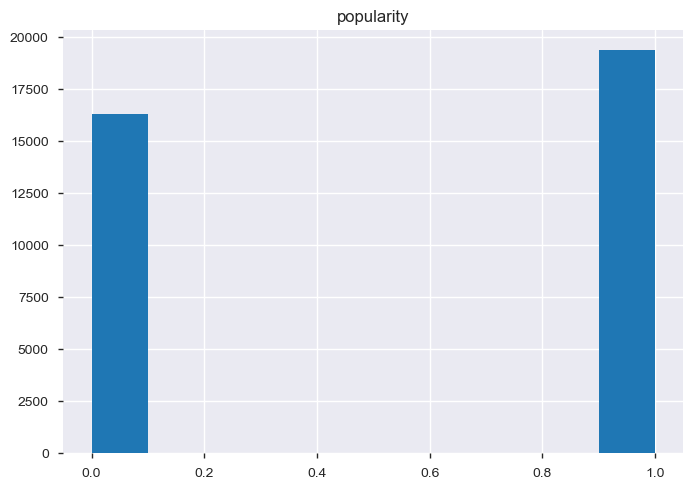

In [25]:
# Create a new target variable
online_news2['popularity'] = online_news2['shares'].apply(lambda x: 0 if x <1300 else 1)

online_news2.hist(column="popularity")

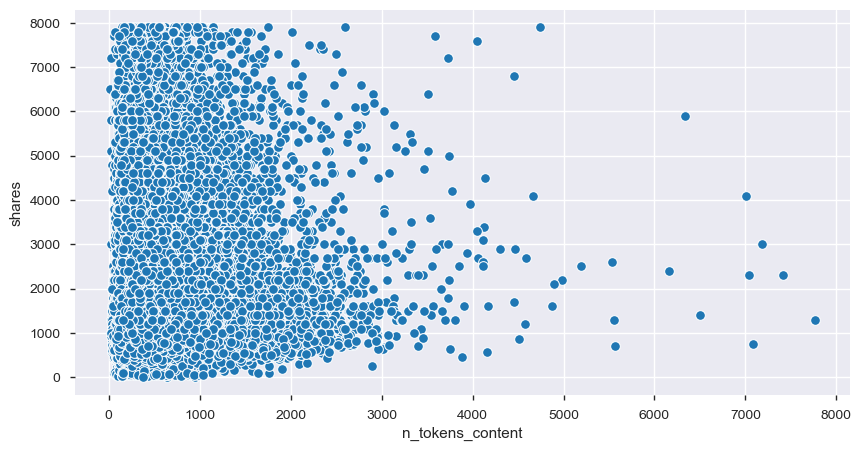

In [26]:
# Number of words in content vs Number of shares

plt.figure(figsize=(10,5))
ax = sns.scatterplot(y='shares', x='n_tokens_content', data=online_news2,palette='muted');

In [27]:
online_news2[['n_tokens_content','shares']].corr()

,n_tokens_content,shares
n_tokens_content,1.000000,0.047474
shares,0.047474,1.000000


We observe that people do not like to read longer news articles and hence would not share longer articles

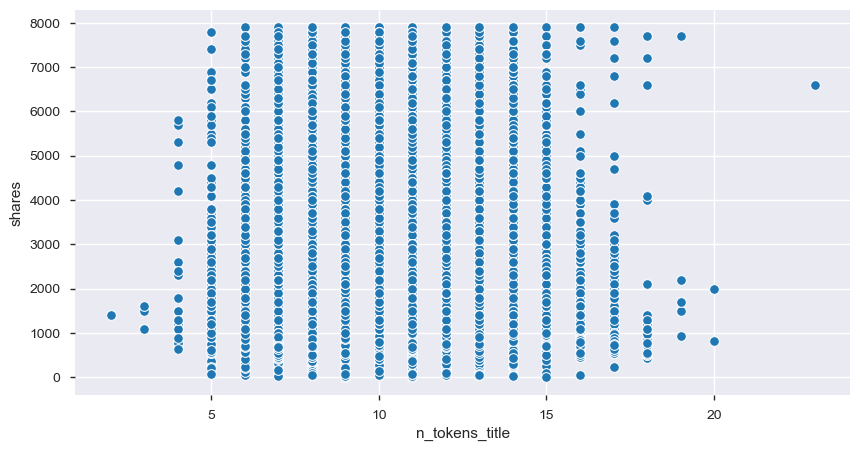

In [28]:
# Number of words in title vs Number of shares

plt.figure(figsize=(10,5))
ax = sns.scatterplot(y='shares', x='n_tokens_title', data=online_news2,palette='muted');

In [29]:
online_news2[['n_tokens_title','shares']].corr()

,n_tokens_title,shares
n_tokens_title,1.000000,-0.037296
shares,-0.037296,1.000000


Number of words in the title determine whether the reader would like to read more or not. Articles with long titles are not favoured by readers.

# Insights and Recommendations


Increase:
-> Amount of key words.
-> Number of linked embedded.
-> Number of images.
-> Reference articles with high popularity.
-> A more subjective and positive title.

Time of publication:

-> Postpone non-time sensitive articles (features etc.) to the weekend. Weekend receive more shares than weekdays.

-> Focus more on social media articles during the weekdays.
      Monday	Social > Lifestyle/ Tech > Business > World/ Entertainment
      Tuesday	Social > Lifestyle/ Tech > Business > Entertainment > World
      Wednesday   	Social > Lifestyle/ Tech > Business > Entertainment > World
      Thursday	Social > Lifestyle/ Tech > Business > Entertainment > World
      Friday	Social > Lifestyle/ Tech > Business > World/ Entertainment
      Saturday	Lifestyle/ Business/ Social/ Tech > Entertainment > World
      Sunday	Lifestyle/ Business/ Social/ Tech > Entertainment > World

Channel:
-> Editors may want to put more emphasis on articles of a specific channel.
-> Social media> technology > lifestyle > business > entertainment > world

# Descriptive statistics of the dataset

In [30]:
online_news2.describe()

,n_tokens_title,n_tokens_content,n_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,...,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,popularity
count,35687.000000,35687.000000,35687.000000,35687.000000,35687.000000,35687.000000,35687.000000,35687.000000,35687.000000,35687.000000,...,35687.000000,35687.000000,35687.000000,35687.000000,35687.000000,35687.000000,35687.000000,35687.000000,35687.000000,35687.000000
mean,10.383165,563.934878,0.565843,11.002662,3.398268,4.404965,1.218931,4.689221,7.200325,0.053437,...,0.777471,-0.265549,-0.534995,-0.110184,0.276522,0.069402,0.342465,0.151875,1884.720795,0.543027
std,2.111162,463.864617,3.709267,11.043969,3.873737,8.152926,4.050418,0.281650,1.921474,0.224906,...,0.212910,0.120434,0.279631,0.094082,0.320951,0.260084,0.188840,0.222247,1482.280298,0.498152
min,2.000000,18.000000,0.114964,0.000000,0.000000,0.000000,0.000000,3.600000,1.000000,0.000000,...,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000,0.000000
25%,9.000000,262.000000,0.477193,5.000000,1.000000,1.000000,0.000000,4.497681,6.000000,0.000000,...,0.600000,-0.328993,-0.714286,-0.125000,0.000000,0.000000,0.166667,0.000000,918.000000,0.000000
50%,10.000000,426.000000,0.542042,8.000000,3.000000,1.000000,0.000000,4.676617,7.000000,0.000000,...,0.800000,-0.255556,-0.500000,-0.100000,0.125000,0.000000,0.500000,0.000000,1300.000000,1.000000
75%,12.000000,730.000000,0.609626,14.000000,4.000000,4.000000,1.000000,4.864198,9.000000,0.000000,...,1.000000,-0.191667,-0.300000,-0.050000,0.500000,0.136364,0.500000,0.250000,2300.000000,1.000000
max,23.000000,7764.000000,701.000000,304.000000,116.000000,128.000000,75.000000,8.041534,10.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,7900.000000,1.000000


# Check for "object" columns and convert them fromSTRING TO NUMERICAL using Label Encoding

In [31]:
online_news2.select_dtypes('object').columns

Index([], dtype='object')

No object columns so Label Encoding is not required

# Scaling of dataset

We will use MinMaxScaler as the default. It’s non-distorting as it doesn’t meaningfully change the information embedded in the original data.
Note that MinMaxScaler doesn’t reduce the importance of outliers

In [32]:
X=online_news2.drop('popularity',axis=1)
y=online_news2['popularity']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

In [33]:
#from sklearn import preprocessing
#mm_scaler = preprocessing.MinMaxScaler()

#X[X.columns] = mm_scaler.fit_transform(X[X.columns])

In [34]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X = ss.fit(X).transform(X.astype(float))

In [35]:
X.shape

(35687, 56)

In [36]:
#X.head()

AttributeError: 'numpy.ndarray' object has no attribute 'head'

# ML - Classification - Base Model

In [37]:
modelscore=[]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [38]:
# Fitting KNN to the training set
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train)

#Predicting the Test set results
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

knn_score = str(accuracy_score(y_test, y_pred))

print('Accuracy : ' + knn_score)

modelscore.append(['KNN',knn_score])

[[2269  910]
 [1359 2600]]
Accuracy : 0.6821238442140656


In [39]:
# Fitting Logistic Regression to the training set
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

logR_score = str(accuracy_score(y_test, y_pred))

print('Accuracy : ' + logR_score)

modelscore.append(['Logistic Regression',logR_score])

[[3179    0]
 [   0 3959]]
Accuracy : 1.0


In [40]:
# Fitting Naive Bayes to the training set
from sklearn.naive_bayes import GaussianNB

classifier = GaussianNB()
classifier.fit(X_train, y_train)

#Predicting the Test set results
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

NB_score = str(accuracy_score(y_test, y_pred))

print('Accuracy : ' + NB_score)

modelscore.append(['Naive Bayes',NB_score])

[[2859  320]
 [1031 2928]]
Accuracy : 0.8107312972821519


In [41]:
#Fitting Random Forest to Training set
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

#Predicting the Test set results
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

RFC_score = str(accuracy_score(y_test, y_pred))

print('Accuracy : ' + RFC_score)

modelscore.append(['Random Forest',RFC_score])

[[3179    0]
 [   0 3959]]
Accuracy : 1.0


In [42]:
scores = pd.DataFrame(modelscore, columns =['Name', 'Score']) 
scores.sort_values(by=['Score'], inplace=True)
scores

,Name,Score
0,KNN,0.6821238442140656
2,Naive Bayes,0.8107312972821519
1,Logistic Regression,1.0
3,Random Forest,1.0


## Above scores are with all base models and all selected features